In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_loan200 = pd.read_csv("loan200.csv")
df_loan200.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(20)

In [4]:
X1 = df_loan200[["payment_inc_ratio", "dti"]].values
Y1 = df_loan200["outcome"].values
knn.fit(X1, Y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [5]:
newloan = np.array([22.5, 9]).reshape(1, -1)
knn.predict(newloan)

array(['default'], dtype=object)

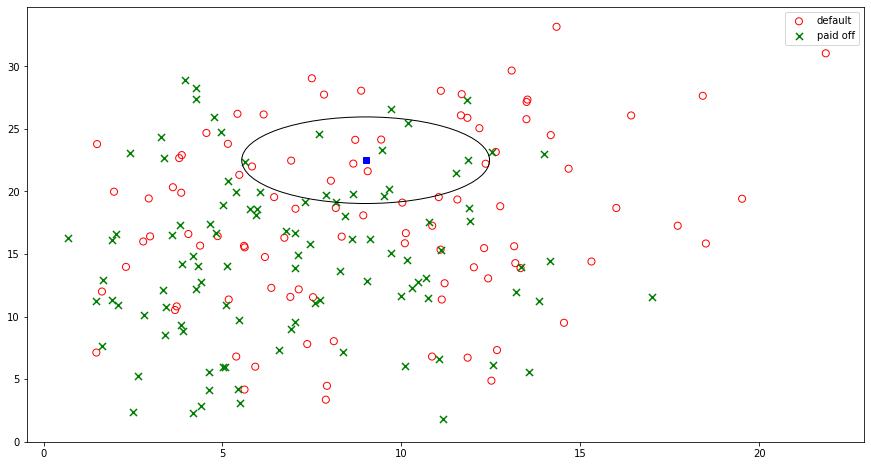

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))

X1_def = df_loan200[df_loan200["outcome"]=="default"]
X1_pai = df_loan200[df_loan200["outcome"]=="paid off"]
ax.scatter(x = X1_def["payment_inc_ratio"], y=X1_def["dti"], facecolor='none', edgecolor='r' , s=50, label="default")
ax.scatter(x = X1_pai["payment_inc_ratio"], y=X1_pai["dti"], c="green", marker="x", s=50, label="paid off")
ax.plot(newloan[0][1], newloan[0][0], marker='s', color='blue')
ax.legend()

#ax.axis("equal")
circle = plt.Circle(np.flip(newloan[0]), radius=knn.kneighbors(np.flip(newloan))[0][0][-1], edgecolor='k', facecolor="none")
ax.add_artist(circle)

In [7]:
#from matplotlib import markers
#markers.MarkerStyle.


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df_loan200["house"])

In [8]:
df_loan = pd.read_csv("loan_data.csv")
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [9]:
X2 = df_loan[["payment_inc_ratio", "dti", "revol_bal", "revol_util"]][1:]
Y2 = df_loan["outcome"][1:]

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [11]:
knn1 = KNeighborsClassifier(5)
knn1.fit(X2.values, Y2.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
newloan = np.array([2.3932, 1, 1687, 9.4]).reshape(1, -1) 
knn1.predict(newloan)

array(['paid off'], dtype=object)

In [13]:
X2.iloc[knn1.kneighbors(newloan)[1][0]]

,payment_inc_ratio,dti,revol_bal,revol_util
35536,1.47212,1.46,1686,10.0
33651,3.38178,6.37,1688,8.4
25863,2.36303,1.39,1691,3.5
42953,1.28160,7.14,1684,3.9
43599,4.12244,8.98,1684,7.2


In [14]:
X2_t = ss.fit_transform(X2)
knn2 = KNeighborsClassifier(5)
knn2.fit(X2_t, Y2.values)
newloan = np.array([2.3932, 1, 1687, 9.4]).reshape(1, -1) 
knn2.predict(ss.transform(newloan))

array(['paid off'], dtype=object)

In [15]:
X2.iloc[knn2.kneighbors(ss.transform(newloan))[1][0]]

,payment_inc_ratio,dti,revol_bal,revol_util
2080,2.61091,1.03,1218,9.7
1438,2.34343,0.51,278,9.9
30215,2.71200,1.34,1075,8.5
28542,2.39760,0.74,2917,7.4
44737,2.34309,1.37,488,7.2


In [16]:
X4 = df_loan[["dti", "revol_bal", "revol_util", "open_acc", "delinq_2yrs_zero", "pub_rec_zero"]]
Y4 = df_loan["outcome"]

In [17]:
knn3 = KNeighborsClassifier(10)
knn3.fit(X4.values, Y4.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [18]:
probs = knn3.predict_proba(X4.values)
preds = knn3.predict(X4.values)
P = np.hstack((probs, preds.reshape(-1, 1)))
borrow_feature = np.where(P[:,2]=="default", P[:, 0], P[:, 1])
borrow_feature

array([0.7, 0.7, 0.5, ..., 0.7, 0.7, 0.5], dtype=object)

In [19]:
X5 = df_loan[["borrower_score", "payment_inc_ratio"]]
Y5 = df_loan[["outcome"]]

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
#dtc?

In [21]:
pl = dtc.fit(X5.values, Y5.values)
pl

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

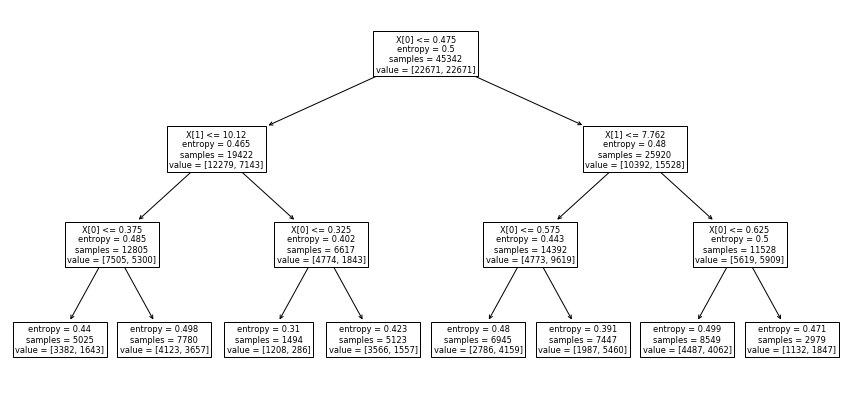

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 7))
f = plot_tree(pl)

In [32]:
df_loan3000 = pd.read_csv("loan3000.csv")
df_loan3000.head()

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [35]:
X6 = df_loan3000[["borrower_score", "payment_inc_ratio"]]
Y6 = df_loan3000["outcome"]

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=123)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=True, random_state=123, verbose=0,
                       warm_start=True)

In [45]:
score = []
for i in range(1, 501):
    rfc.set_params(n_estimators=i)
    rfc.fit(X6.values, Y6.values)
    
    oob_score = 1-rfc.oob_score_
    score.append(oob_score)
score

c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\abh

c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\abh

[0.49,
 0.46299999999999997,
 0.45533333333333337,
 0.45099999999999996,
 0.44433333333333336,
 0.43500000000000005,
 0.43633333333333335,
 0.43533333333333335,
 0.42533333333333334,
 0.42566666666666664,
 0.42733333333333334,
 0.42700000000000005,
 0.42633333333333334,
 0.42433333333333334,
 0.42366666666666664,
 0.41800000000000004,
 0.42000000000000004,
 0.41833333333333333,
 0.42100000000000004,
 0.42133333333333334,
 0.42433333333333334,
 0.42400000000000004,
 0.42466666666666664,
 0.42066666666666663,
 0.42366666666666664,
 0.42600000000000005,
 0.42500000000000004,
 0.42100000000000004,
 0.42033333333333334,
 0.42133333333333334,
 0.42200000000000004,
 0.42300000000000004,
 0.42333333333333334,
 0.42266666666666663,
 0.42066666666666663,
 0.42266666666666663,
 0.42433333333333334,
 0.42333333333333334,
 0.42200000000000004,
 0.42266666666666663,
 0.42233333333333334,
 0.42366666666666664,
 0.42400000000000004,
 0.42533333333333334,
 0.42500000000000004,
 0.42400000000000004,
 0.

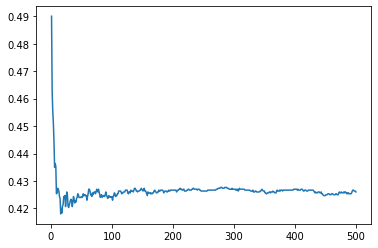

In [48]:
plt.plot(range(1, 501), score)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y6.values, y_pred)

array([[1442,    3],
       [   1, 1554]], dtype=int64)

In [71]:
X7 = df_loan.drop(["outcome", "Unnamed: 0", "emp_length", "home_ownership", "status", "purpose"], axis=1)
Y7 = df_loan["outcome"]

In [72]:
rfc1 = RandomForestClassifier(500, max_features=3)
rfc1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in X7.columns:
    #print(col)
    try:
        X7[col] = X7[col].astype(float)
    except:
        X7[col] = le.fit_transform(X7[col].values)
X7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 15 columns):
loan_amnt            45342 non-null float64
term                 45342 non-null int32
annual_inc           45342 non-null float64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null float64
revol_util           45342 non-null float64
delinq_2yrs_zero     45342 non-null float64
pub_rec_zero         45342 non-null float64
open_acc             45342 non-null float64
grade                45342 non-null float64
purpose_             45342 non-null int32
home_                45342 non-null int32
emp_len_             45342 non-null int32
borrower_score       45342 non-null float64
dtypes: float64(11), int32(4)
memory usage: 4.5 MB


In [74]:
rfc1.fit(X7.values, Y7.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

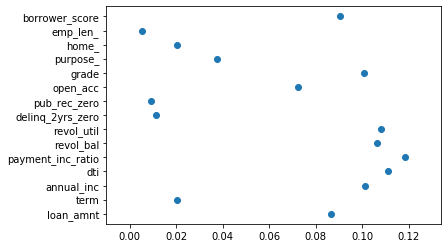

In [75]:
plt.scatter(rfc1.feature_importances_, X7.columns)

In [82]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [87]:
#emp_length, home_ownership, status, purpose
X8 = df_loan3000[['borrower_score', 'payment_inc_ratio']]
Y8 = df_loan3000["outcome"].replace({"default":0, "paid off":1})

In [88]:
xgb.fit(X8.values, Y8.values)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [89]:
X8["Pred"] = xgb.predict(X8.values)
X8

c:\users\abhishek\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,borrower_score,payment_inc_ratio,Pred
0,0.40,5.111350,1
1,0.40,5.431650,0
2,0.70,9.230030,1
3,0.40,2.334820,1
4,0.45,12.103200,0
5,0.50,3.893910,1
6,0.40,7.003900,0
7,0.40,10.040700,1
8,0.55,3.549720,1
9,0.45,7.509840,1


Text(0.5, 0, 'borrower_score')

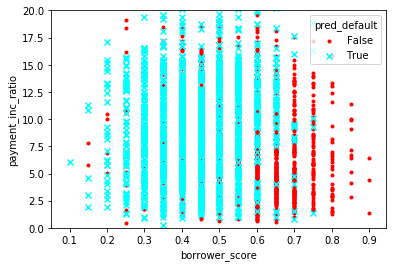

In [102]:
x1 = X8[(X8["Pred"]==0)]
x2 = X8[(X8["Pred"]==1)]
plt.scatter(x=x2["borrower_score"], y=x2["payment_inc_ratio"], c='red', marker='.', label="False")
plt.scatter(x=x1["borrower_score"], y=x1["payment_inc_ratio"], c='cyan', marker='x', label="True")
plt.legend(title="pred_default")
plt.ylim(0, 20)
plt.ylabel("payment_inc_ratio")
plt.xlabel("borrower_score")

In [104]:
X9 = X7[:]
Y9 = Y7[:]
X9.head()

,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,purpose_,home_,emp_len_,borrower_score
0,2500.0,1,30000.0,1.00,2.39320,1687.0,9.4,1.0,1.0,3.0,4.8,3,2,1,0.65
1,5600.0,1,40000.0,5.55,4.57170,5210.0,32.6,1.0,1.0,11.0,1.4,6,1,1,0.80
2,5375.0,1,15000.0,18.08,9.71600,9279.0,36.5,1.0,1.0,2.0,6.0,5,2,1,0.60
3,9000.0,0,30000.0,10.08,12.21520,10452.0,91.7,1.0,1.0,4.0,4.2,1,2,1,0.50
4,10000.0,0,100000.0,7.06,3.90888,11997.0,55.5,1.0,1.0,14.0,5.4,5,2,1,0.55


In [106]:
xgb1 = XGBClassifier(n_estimators=250)
xgb1

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [109]:
from sklearn.model_selection import train_test_split
X9_train, X9_test, Y9_train, Y9_test = train_test_split(X9.values, Y9.values, random_state=25, test_size=10000 )
print(X9_train.shape) 
print(X9_test.shape) 
print(Y9_train.shape) 
print(Y9_test.shape)

(35342, 15)
(10000, 15)
(35342,)
(10000,)


In [110]:
xgb1.fit(X9_train, Y9_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [123]:
from sklearn.metrics import accuracy_score

y_preds = xgb1.predict(X9_test)
accuracy = accuracy_score(Y9_test, y_preds)
error_rate = 1 - accuracy
print("test error rate:", error_rate)

y_preds = xgb1.predict(X9_train)
accuracy = accuracy_score(Y9_train, y_preds)
error_rate = 1 - accuracy
print("train error rate:", error_rate)


test error rate: 0.34740000000000004
train error rate: 0.14238017090147703


In [124]:
xgb2 = XGBClassifier(eta=.1, subsample=.63, reg_lambda=1000, n_estimators=250)
xgb2

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eta=0.1, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=1000, scale_pos_weight=None, subsample=0.63,
              tree_method=None, validate_parameters=False, verbosity=None)

In [128]:
xgb2.fit(X9_train, Y9_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1000, scale_pos_weight=1, subsample=0.63,
              tree_method=None, validate_parameters=False, verbosity=None)

In [129]:
y_preds = xgb2.predict(X9_test)
accuracy = accuracy_score(Y9_test, y_preds)
error_rate = 1 - accuracy
print("after regularisation test error rate:", error_rate)

y_preds = xgb2.predict(X9_train)
accuracy = accuracy_score(Y9_train, y_preds)
error_rate = 1 - accuracy
print("after regularisation train error rate:", error_rate)

after regularisation test error rate: 0.32809999999999995
after regularisation train error rate: 0.31319676305811783


In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
default_train = []
default_test = []
penalty_trian = []
penalty_test = []

def get_error_rates(model):
    res = []
    
    y_preds = model.predict(X9_test)
    accuracy = accuracy_score(Y9_test, y_preds)
    error_rate = 1 - accuracy
    res.append(error_rate)

    y_preds = model.predict(X9_train)
    accuracy = accuracy_score(Y9_train, y_preds)
    error_rate = 1 - accuracy
    res.append(error_rate)
    
    return res


for i in range(1, 250):
    xgb1.set_params(n_estimators = i)
    xgb1.fit(X9_train, Y9_train)
    
    def_train, def_test = get_error_rates(xgb1)
    
    xgb2.set_params(n_estimators = i)
    xgb2.fit(X9_train, Y9_train)
    
    pen_train, pen_test = get_error_rates(xgb2)
    
    default_train.append(def_train)
    default_test.append(def_test)
    penalty_trian.append(pen_train)
    penalty_test.append(pen_test)

default_train, default_test, pen_train, pen_test    

([0.35219999999999996,
  0.3479,
  0.3488,
  0.3448,
  0.3389,
  0.33930000000000005,
  0.33609999999999995,
  0.3358,
  0.33430000000000004,
  0.33520000000000005,
  0.3335,
  0.3337,
  0.3348,
  0.33409999999999995,
  0.33309999999999995,
  0.33199999999999996,
  0.33109999999999995,
  0.3316,
  0.33109999999999995,
  0.33140000000000003,
  0.33220000000000005,
  0.33220000000000005,
  0.33209999999999995,
  0.33220000000000005,
  0.3326,
  0.3325,
  0.33409999999999995,
  0.33409999999999995,
  0.33540000000000003,
  0.33540000000000003,
  0.33530000000000004,
  0.3337,
  0.3337,
  0.33420000000000005,
  0.3345,
  0.3347,
  0.3347,
  0.33440000000000003,
  0.33409999999999995,
  0.33430000000000004,
  0.33540000000000003,
  0.33540000000000003,
  0.3347,
  0.33430000000000004,
  0.33430000000000004,
  0.3345,
  0.33430000000000004,
  0.3348,
  0.33540000000000003,
  0.33499999999999996,
  0.3355,
  0.3358,
  0.3358,
  0.3359,
  0.33599999999999997,
  0.3359,
  0.3357,
  0.3364000000

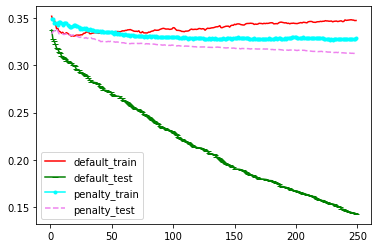

In [144]:
plt.plot(range(1, 250), default_train, c='red', label="default_train")
plt.plot(range(1, 250), default_test, c='green', marker="_", label="default_test")
plt.plot(range(1, 250), penalty_trian, c='cyan', marker=".", label="penalty_train")
plt.plot(range(1, 250), penalty_test, c='violet', linestyle="dashed", label="penalty_test")
plt.legend()

In [ ]:
#grid search CV 5 fold with xgb boost eta and max_depth hyper parameters